In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Python Project/practice/project_data.csv")

In [3]:
print(df.shape)

(3406, 12)


In [4]:
df.head()

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,S*I..N..C..Ind.,20220703,6600.0,6640.0,6530.0,6570.0,568548012690,86570273,6032,D,6680.0,6580.0
1,S*I..N..C..Ind.,20220702,6650.0,6750.0,6580.0,6680.0,786484354990,117817935,4930,D,6740.0,6640.0
2,S*I..N..C..Ind.,20220629,6770.0,6770.0,6680.0,6740.0,364468985740,54052654,3437,D,6740.0,6750.0
3,S*I..N..C..Ind.,20220628,6750.0,6800.0,6700.0,6740.0,611112726900,90692641,4911,D,6720.0,6740.0
4,S*I..N..C..Ind.,20220627,6640.0,6820.0,6640.0,6720.0,781397951230,116348740,5920,D,6710.0,6740.0


In [5]:
df.tail()

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
3401,S*I..N..C..Ind.,20070210,4008.0,4008.0,4008.0,4008.0,162907276224,40645528,4984,D,3930.0,4008.0
3402,S*I..N..C..Ind.,20070207,3930.0,3930.0,3930.0,3930.0,122171316570,31086849,4247,D,3853.0,3930.0
3403,S*I..N..C..Ind.,20070206,3853.0,3853.0,3853.0,3853.0,103453562449,26850133,4118,D,3778.0,3853.0
3404,S*I..N..C..Ind.,20070205,3778.0,3778.0,3778.0,3778.0,40902501888,10826496,1709,D,3704.0,3778.0
3405,S*I..N..C..Ind.,20070204,4000.0,4000.0,3600.0,3704.0,640374172370,172898994,2489,D,4000.0,3704.0


In [6]:
df_cl = df['<CLOSE>']
print(type(df_cl))
print(df_cl.shape)
print(df_cl)

<class 'pandas.core.series.Series'>
(3406,)
0       6570.0
1       6680.0
2       6740.0
3       6740.0
4       6720.0
         ...  
3401    4008.0
3402    3930.0
3403    3853.0
3404    3778.0
3405    3704.0
Name: <CLOSE>, Length: 3406, dtype: float64


In [7]:
values_cl = np.array(df_cl)

In [8]:
print(values_cl, type(values_cl), values_cl.shape, values_cl[2], values_cl[3405])

[6570. 6680. 6740. ... 3853. 3778. 3704.] <class 'numpy.ndarray'> (3406,) 6740.0 3704.0


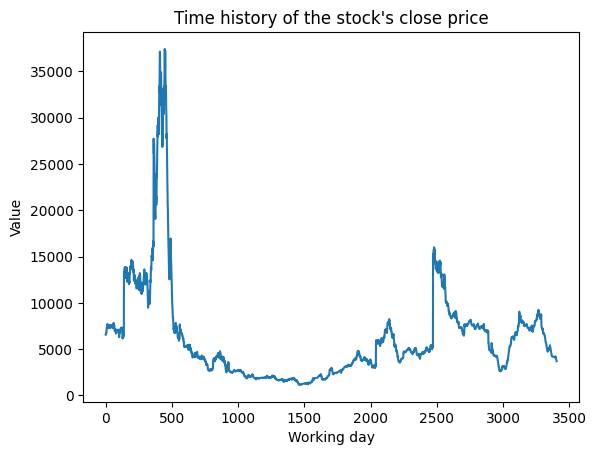

In [9]:
plt.plot(values_cl)
plt.title("Time history of the stock's close price")
plt.xlabel("Working day")
plt.ylabel("Value")
plt.show() 

In [10]:
# derivative
dy = values_cl[1:] - values_cl[:-1] 
dx = 1
ydot = values_cl.copy() # ydot has 3406 components
ydot[1:] = dy/dx  
ydot[0] = ydot[1] 
print(ydot.shape)

(3406,)


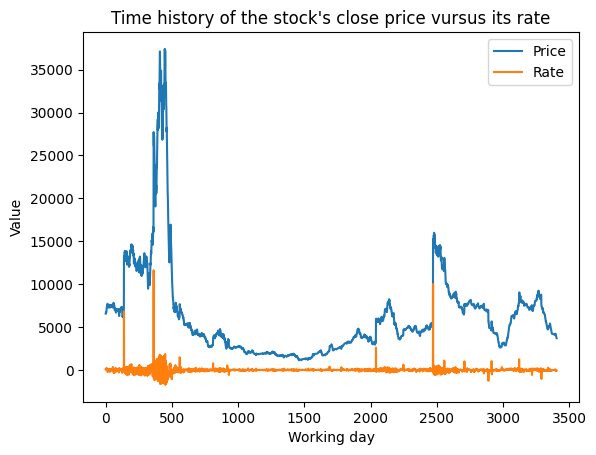

In [11]:
plt.plot(values_cl, label="Price")
plt.plot(ydot, label="Rate")
plt.title("Time history of the stock's close price vursus its rate")
plt.xlabel("Working day")
plt.ylabel("Value") 
plt.legend()
plt.show() 

In [13]:
# A set for the close price composed of lists with d elements
d = 10
window_size = d
dset = []
dset_predict = []
for i in range(np.size(values_cl) - window_size):
  i_d = i + (window_size - 1)
  dset.append(values_cl[i:i_d])
  if values_cl[i_d] <= values_cl[i_d + 1]:
    dset_predict.append(True)
  else:
    dset_predict.append(False)

In [14]:
print(dset)
print(dset[0])
print(type(dset))

[array([6570., 6680., 6740., 6740., 6720., 6710., 6940., 7180., 7300.]), array([6680., 6740., 6740., 6720., 6710., 6940., 7180., 7300., 7370.]), array([6740., 6740., 6720., 6710., 6940., 7180., 7300., 7370., 7400.]), array([6740., 6720., 6710., 6940., 7180., 7300., 7370., 7400., 7440.]), array([6720., 6710., 6940., 7180., 7300., 7370., 7400., 7440., 7520.]), array([6710., 6940., 7180., 7300., 7370., 7400., 7440., 7520., 7650.]), array([6940., 7180., 7300., 7370., 7400., 7440., 7520., 7650., 7720.]), array([7180., 7300., 7370., 7400., 7440., 7520., 7650., 7720., 7470.]), array([7300., 7370., 7400., 7440., 7520., 7650., 7720., 7470., 7370.]), array([7370., 7400., 7440., 7520., 7650., 7720., 7470., 7370., 7340.]), array([7400., 7440., 7520., 7650., 7720., 7470., 7370., 7340., 7310.]), array([7440., 7520., 7650., 7720., 7470., 7370., 7340., 7310., 7320.]), array([7520., 7650., 7720., 7470., 7370., 7340., 7310., 7320., 7400.]), array([7650., 7720., 7470., 7370., 7340., 7310., 7320., 7400., 

In [15]:
dset = np.array(dset) # convert the list to a matrix (or array)
print(dset, type(dset), dset.shape)

[[6570. 6680. 6740. ... 6940. 7180. 7300.]
 [6680. 6740. 6740. ... 7180. 7300. 7370.]
 [6740. 6740. 6720. ... 7300. 7370. 7400.]
 ...
 [4111. 4191. 4216. ... 4092. 4012. 4008.]
 [4191. 4216. 4227. ... 4012. 4008. 3930.]
 [4216. 4227. 4235. ... 4008. 3930. 3853.]] <class 'numpy.ndarray'> (3396, 9)


In [16]:
print(dset_predict)
print(dset_predict[0])
print(type(dset_predict))

[True, True, True, True, True, False, False, False, False, True, True, True, False, False, True, True, True, True, True, False, True, True, False, False, True, True, False, True, True, True, True, False, True, True, False, False, False, True, False, False, False, True, False, False, True, True, False, True, True, True, True, False, False, True, True, False, False, False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, True, False, True, True, False, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, True, True, True, False, True, True, True, True, False, False, False, True, True, True, False, True, True, False, True, True, True, False, False, False, False, False, False, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, True, True, False, False, False, False, True, True, False, False, True, True, True, False, False, False, False, True,